In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

# Univariate Analysis

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


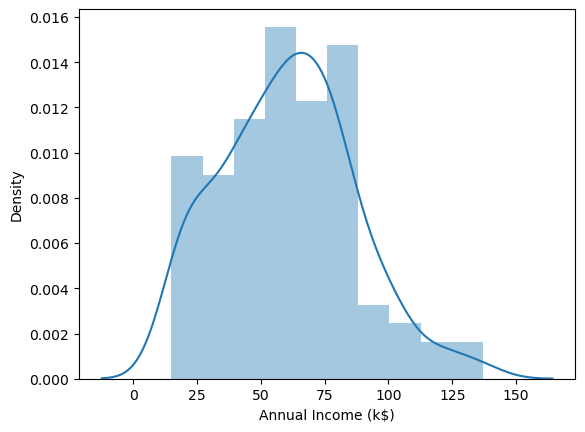

In [6]:
sns.distplot(df['Annual Income (k$)'] );

In [7]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

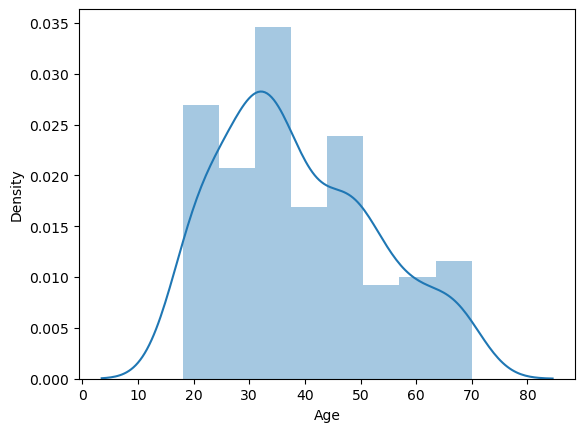

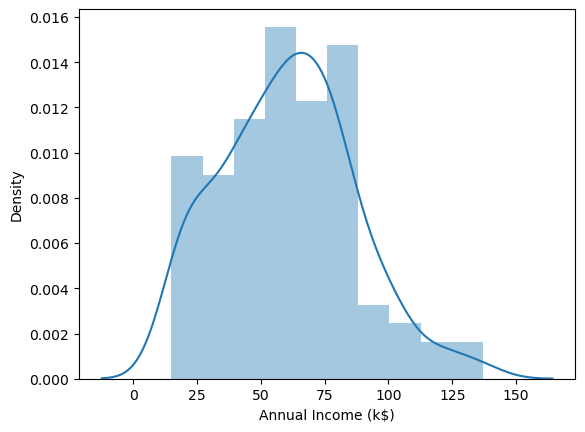

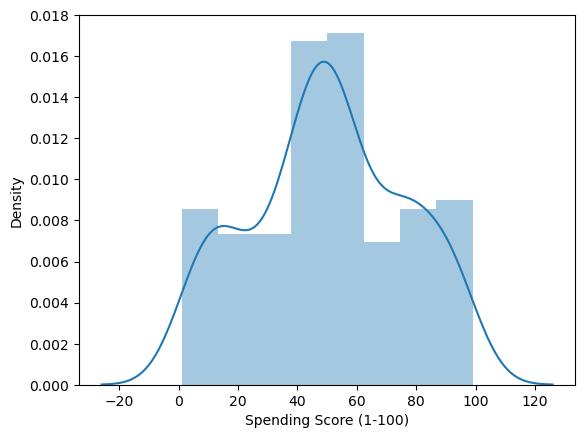

In [8]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

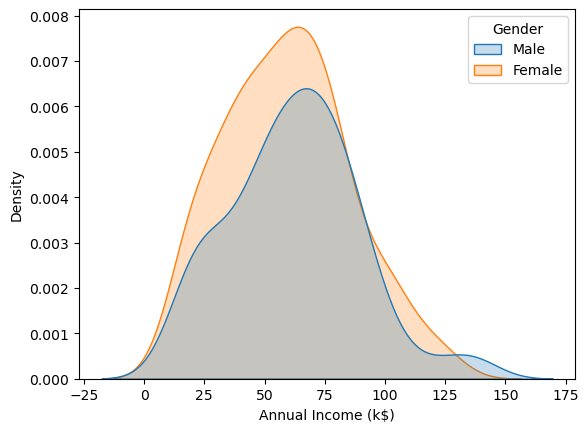

In [9]:
sns.kdeplot(data = df, x = 'Annual Income (k$)',shade=True, hue=df['Gender']);

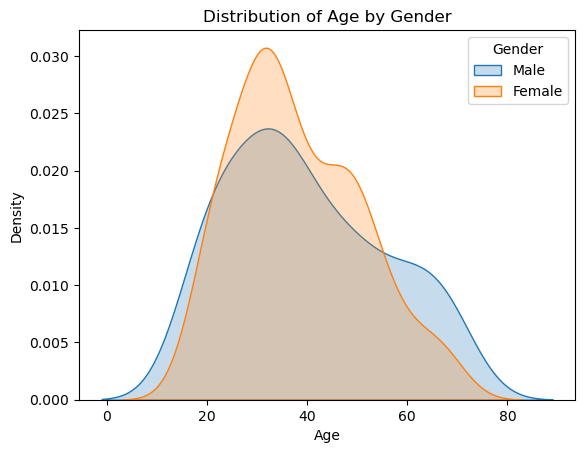

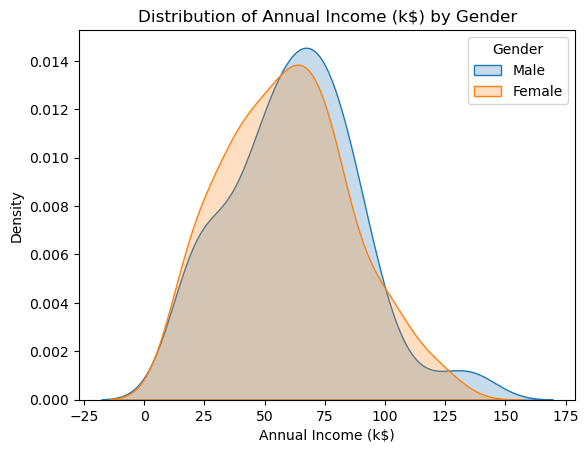

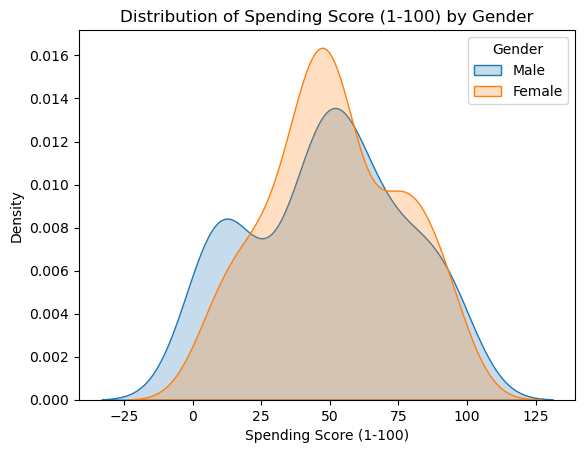

In [10]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    for gender in df['Gender'].unique():
        sns.kdeplot(data=df[df['Gender'] == gender], x=i, shade=True, label=gender)
    plt.title(f'Distribution of {i} by Gender')
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.legend(title='Gender')
    plt.show()


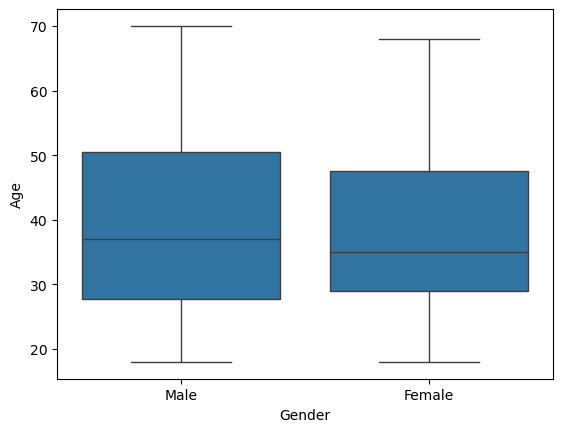

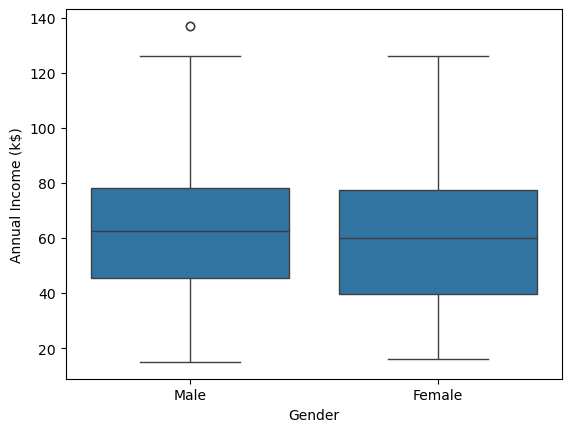

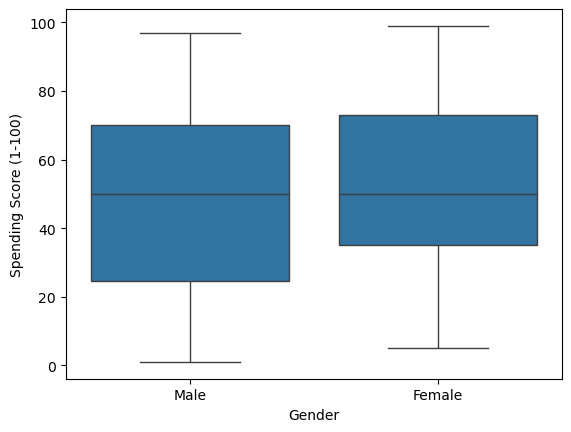

In [11]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [12]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

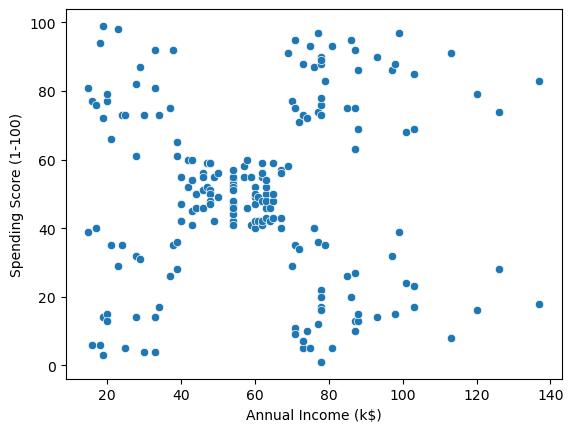

In [13]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

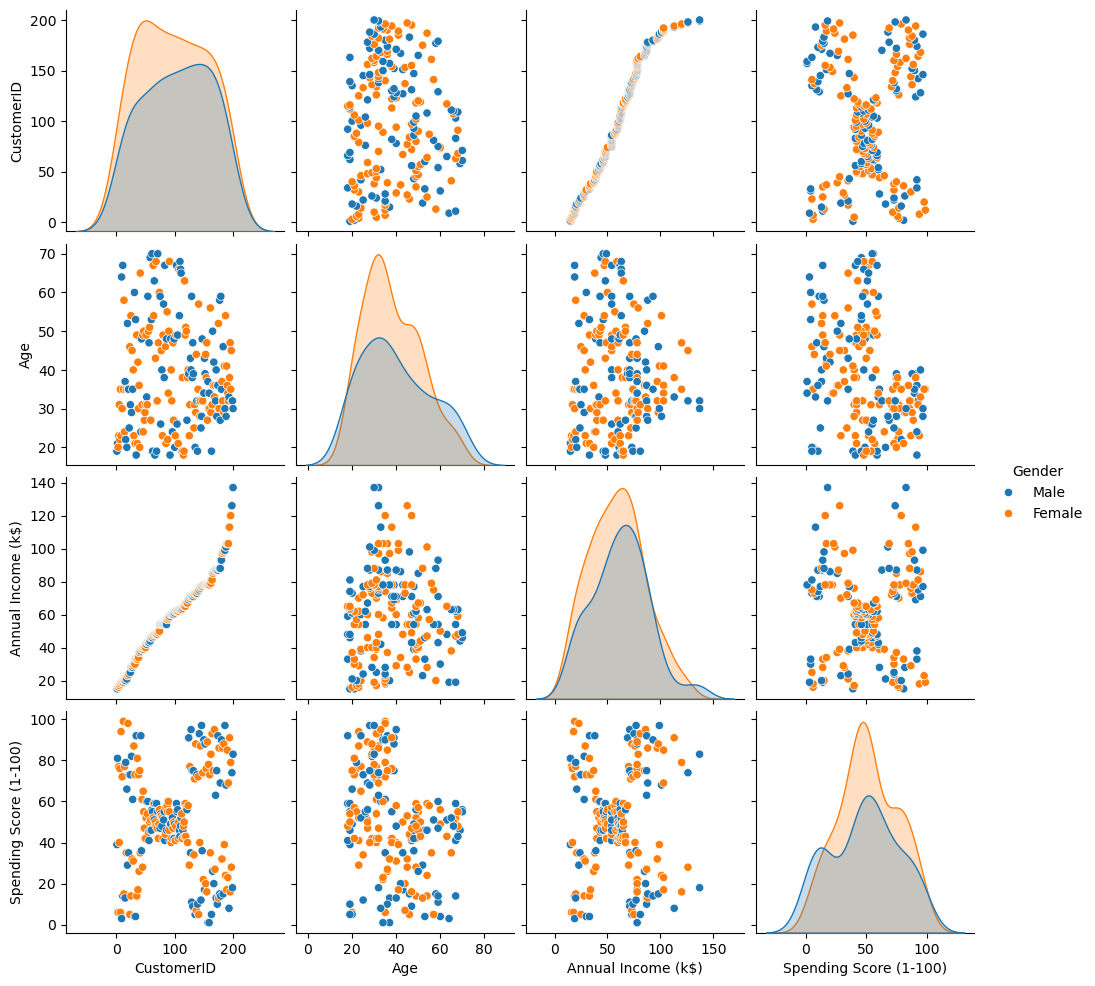

In [14]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [15]:
df.groupby('Gender')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [16]:
df_numeric = df.drop(['CustomerID', 'Gender'], axis = 1)
df_numeric.corr()



,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

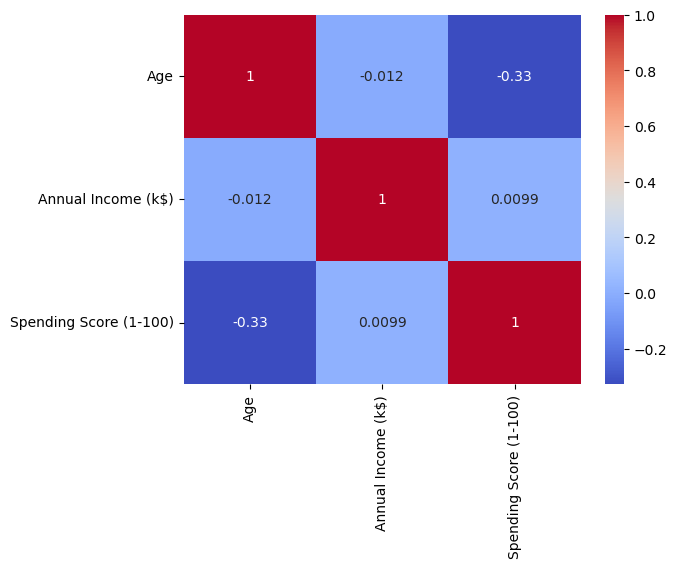

In [17]:
sns.heatmap(df_numeric.corr(),annot=True,cmap='coolwarm')

# Clustering - Univariate, Bivariate, Multivariate

## Univariate

In [18]:
# Initialize the K-means Model:
clustering1 = KMeans(n_clusters=3)


In [19]:
# # Fit the Model:
# This fits the K-means model using the Annual Income (k$) column as the input.
# K-means tries to find 3 clusters (groups) in the data based on the values of Annual Income (k$).
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [20]:

# Get Cluster Labels:
# This retrieves an array of cluster labels for each data point.
# Each number in the labels_ array corresponds to a cluster (0, 1, or 2 in this case) that each data point has been assigned to.
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [21]:
# Assign Labels to a New Column:
# This creates a new column called Income Cluster in your DataFrame, df, and assigns the cluster label of each data point to this column.
# This means each row in the df now has an Income Cluster value, indicating which cluster that customer's income belongs to.

df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [22]:
df['Income Cluster'].value_counts()

Income Cluster
2    90
1    74
0    36
Name: count, dtype: int64

In [23]:
# Inertia is a measure of how well the clusters have been formed and is often used to
# evaluate the quality of the clustering. Here’s what it means and how it’s used:
clustering1.inertia_

23517.33093093093

In [24]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [25]:
intertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3931.9880952380945,
 2862.8330280830296,
 2226.9501443001454,
 1746.4707792207803]

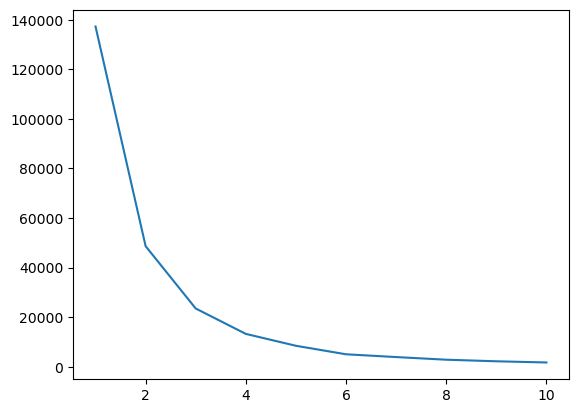

In [26]:
plt.plot(range(1,11),intertia_scores)

In [27]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [28]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


## Bivariate Clustering

In [29]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,3


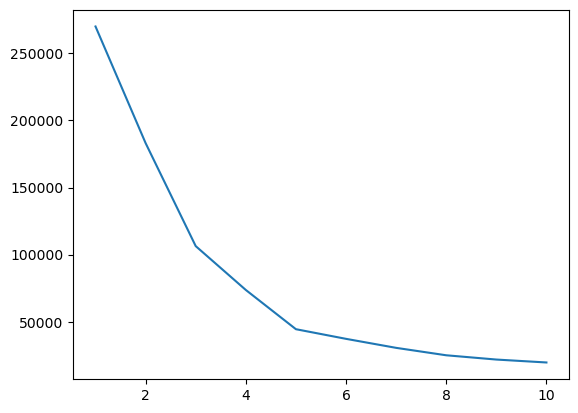

In [30]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [31]:
centers =pd.DataFrame(clustering2.cluster_centers_)
# centers = pd.DataFrame(clustering2.cluster_centers_)
# This line takes the cluster_centers_ attribute from the clustering2 object 
# (which represents the coordinates of the centroids of each cluster identified by the KMeans algorithm) 
centers

,0,1
0,86.538462,82.128205
1,55.296296,49.518519
2,25.727273,79.363636
3,26.304348,20.913043
4,88.200000,17.114286


In [48]:
centers.shape

(5, 2)

In [32]:
# centers.columns = ['x','y']
centers.columns = ['x','y']

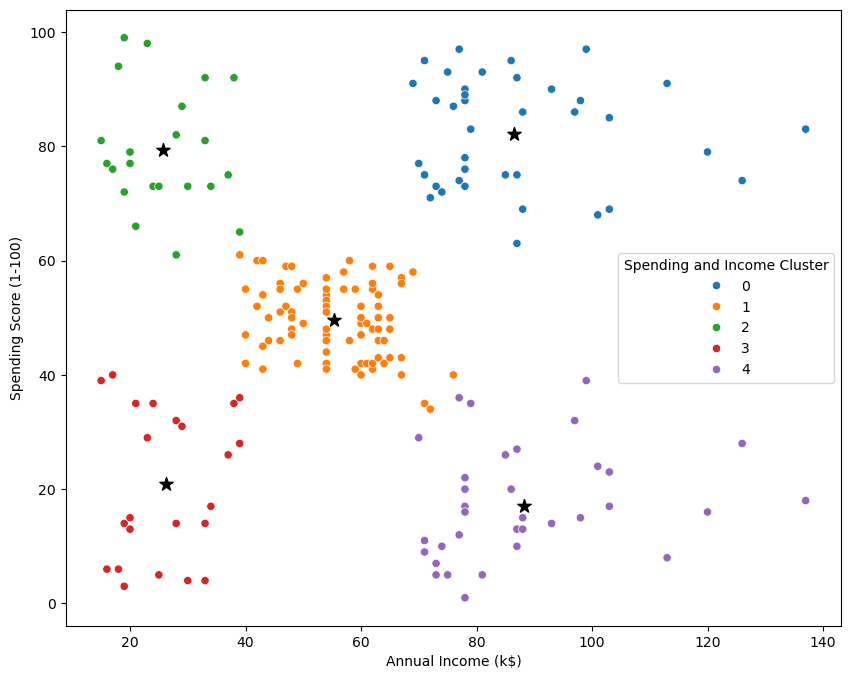

In [33]:
plt.figure(figsize=(10,8))
# Use plt.scatter() for quick and simple scatter plots when you don't need advanced styling or legends.
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
#Use sns.scatterplot() when working with pandas DataFrames or when you want more styled plots with easier handling of different categories.
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [34]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

# is used to create a cross-tabulation (or contingency table) that displays the distribution of genders 
# within each cluster created by the KMeans algorithm. Here’s a detailed explanation of what it does:

# This parameter normalizes the table along each row (index),
#meaning the values in each row will sum up to 1 (or 100% if multiplied by 100).

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.592593,0.407407
2,0.590909,0.409091
3,0.608696,0.391304
4,0.457143,0.542857


In [35]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,25.272727,25.727273,79.363636
3,45.217391,26.304348,20.913043
4,41.114286,88.200000,17.114286


In [36]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [37]:
scale = StandardScaler()

In [38]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,3


In [39]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,3,True
1,2,21,15,81,1,2,True
2,3,20,16,6,1,3,False
3,4,23,16,77,1,2,False
4,5,31,17,40,1,3,False


In [40]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [41]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [42]:
dff = scale.fit_transform(dff)

In [43]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


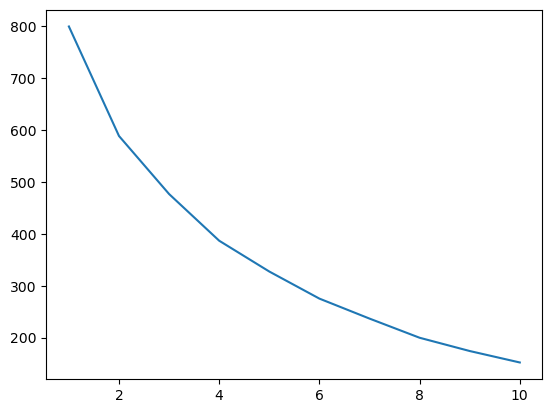

In [44]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [45]:
# select 3 or 4

In [46]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0
196,197,Female,45,126,28,0,4
197,198,Male,32,126,74,0,0
198,199,Male,32,137,18,0,4


In [47]:
df.to_csv('Clustering.csv')